# Área de imports

In [ ]:
! pip install texthero

In [3]:
import pandas as pd 
import seaborn as sns 
import texthero as hero 
import matplotlib.pyplot as plt 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Carregamento dos dados

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/LucasRotsen/tcc_case_study_tutorial/main/data/SMSSpamCollection.txt', sep='\t', names=['label', 'message', 'a'])

In [16]:
df = df[['label', 'message']]

# Análise exploratória dos dados

In [18]:
df.columns

Index(['label', 'message'], dtype='object')

In [19]:
df.shape

(1400, 2)

In [20]:
df.head(5)

,label,message
0,spam,free entry wkly comp win fa cup final tkts 21s...
1,spam,freemsg hey darling week word back like fun st...
2,spam,winner valued network customer selected receiv...
3,spam,mobile months u r entitled update latest colou...
4,spam,six chances win cash pounds txt csh11 send cos...


In [ ]:
df[df['label'] == 'spam'].head(15) ## os primeiros 15 primeiros de spam 

In [ ]:
df[df['label'] == 'ham'].head(15) ## os primeiros 15 primeiros de ham 

In [23]:
df.isna().sum() ## dados faltantes em cada coluna

label      0
message    1
dtype: int64

In [27]:
df['label'].value_counts() ## distribuicao de dados (balanceamento)

spam    700
ham     700
Name: label, dtype: int64

In [ ]:
df['label'].value_counts().plot(kind='bar') ## distribuicao de dados + grafico

In [30]:
df = df.dropna() ## deletar registro nulo

In [34]:
df['message-size'] = df['message'].apply(lambda x: len(x))

df.groupby('label')['message-size'].mean() 

## calcular a media de palavras por tipo de mensagem


label
ham     43.991416
spam    92.261429
Name: message-size, dtype: float64

In [38]:
## definir quais sao as palavras mais comuns 

def text_cleaning(df):
  custom_pip = [
                hero.preprocessing.lowercase,
                hero.preprocessing.remove_digits,
                hero.preprocessing.remove_punctuation,
                hero.preprocessing.remove_stopwords,
                hero.preprocessing.remove_whitespace
  ]

  return hero.clean(df['message'], custom_pip)

In [41]:
df['message'] = text_cleaning(df)

In [44]:
def collect_n_most_frequent_words(df, n):
  return pd.Series(' '.join(df['message']).split()).value_counts()[:n].to_dict()

In [46]:
spam_df = df[df['label'] == 'spam'] 

top_20 = collect_n_most_frequent_words(spam_df, 20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



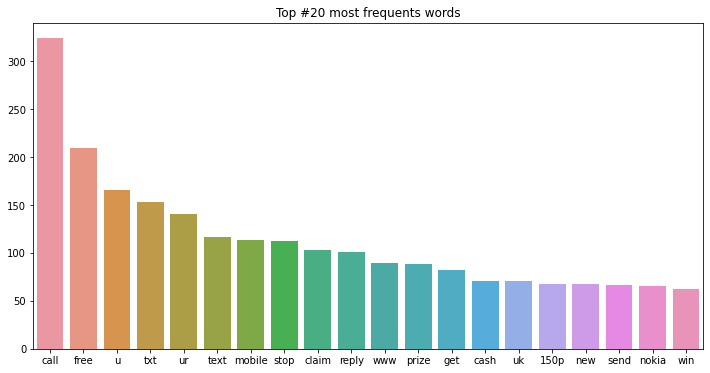

In [50]:
plt.figure(figsize=(12,6))

chart = sns.barplot(
    list(top_20.keys()),
    list(top_20.values())
).set_title("Top #20 most frequents words")